In [29]:
import os
import matplotlib.pyplot as plt
import random, math
import numpy as np
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

# 制作并保存数据集

In [40]:
x_values = []
y_values = []

for i in range(2000):
    x = random.random() - 0.5
    y = random.random() - 0.5
    if (0.1 < abs(x) < 0.2 and abs(y) < 0.2) or (0.1 < abs(y) < 0.2 and abs(x) < 0.2):
        x_values.append(x)
        y_values.append(y)
    elif (0.4 < abs(x) < 0.5 and abs(y) < 0.5) or (0.4 < abs(y) < 0.5 and abs(x) < 0.5):
        x_values.append(x)
        y_values.append(y)

print(len(x_values), len(y_values))
data = []
data = list(zip(x_values, y_values))
data = np.array(data)
print(data)
np.save('./data/data.npy', data)

969 969
[[ 0.1324188  -0.00865698]
 [ 0.150309   -0.43627515]
 [-0.13669088  0.01230497]
 ...
 [-0.10529265 -0.12173005]
 [-0.46797987  0.36097314]
 [ 0.4764209  -0.06135248]]


# 准备部分

In [31]:
UNCLASSIFIED = False
NOISE = 0.1 # 设置噪声点

In [32]:
def dist(a, b):
    '''计算两个向量的欧氏距离'''
    return math.sqrt(np.power(a - b, 2).sum())

In [33]:
def eps_neighbor(a, b, eps):
    '''判断两个向量之间的距离是否在epsilon内'''
    return dist(a, b) < eps

In [34]:
def region_query(data, pointId, eps):
    '''找到在epsilon范围内的点的id'''
    nPoints = data.shape[1]
    seeds = []
    for i in range(nPoints):
        if eps_neighbor(data[:, pointId], data[:, i], eps):
            seeds.append(i)
    return seeds

In [35]:
def expand_cluster(data, clusterResult, pointId, clusterId, eps, minPts):
    '''判断是否成功聚类，成功的持续扩张，不成功标为噪声点'''
    seeds = region_query(data, pointId, eps)
    if len(seeds) < minPts:  # 不满足minPts条件的为噪声点
        clusterResult[pointId] = NOISE
        return False
    else:
        clusterResult[pointId] = clusterId  # 划分到该簇
        for seedId in seeds:
            clusterResult[seedId] = clusterId

        while len(seeds) > 0:  # 持续扩张
            currentPoint = seeds[0]
            queryResults = region_query(data, currentPoint, eps)
            if len(queryResults) >= minPts:
                for i in range(len(queryResults)):
                    resultPoint = queryResults[i]
                    if clusterResult[resultPoint] == UNCLASSIFIED:  # UNCLASSIFIED = False
                        seeds.append(resultPoint)
                        clusterResult[resultPoint] = clusterId
                    elif clusterResult[resultPoint] == NOISE:
                        clusterResult[resultPoint] = clusterId
            seeds = seeds[1:]
        return True

In [36]:
def dbscan(data, eps, minPts):
    '''DBSCAN,输入数据集，半径大小，最小点数，输出簇id，簇数目。'''   
    clusterId = 1
    nPoints = data.shape[1]
    clusterResult = [UNCLASSIFIED] * nPoints
    for pointId in range(nPoints):
        point = data[:, pointId]
        if clusterResult[pointId] == UNCLASSIFIED:
            if expand_cluster(data, clusterResult, pointId, clusterId, eps, minPts):
                clusterId = clusterId + 1
    return clusterResult, clusterId - 1

In [37]:
def plotFeature(name, data, clusters, clusterNum):
    '''绘制分类结果'''
    nPoints = data.shape[1]
    matClusters = np.mat(clusters).transpose()
    fig = plt.figure(name)
    scatterColors = ['black', 'blue', 'green',
                     'yellow', 'red', 'purple', 'orange', 'brown']
    ax = fig.add_subplot(111)
    plt.title(name)
    for i in range(clusterNum + 1):
        colorSytle = scatterColors[i % len(scatterColors)]
        subCluster = data[:, np.nonzero(matClusters[:, 0].A == i)]
        ax.scatter(subCluster[0, :].flatten().A[0],
                   subCluster[1, :].flatten().A[0], c=colorSytle, s=20)

# 读取查看数据集

[[-0.45706237  0.14360659]
 [ 0.18577367  0.43486021]
 [ 0.03249221 -0.18466199]
 ...
 [-0.1978995   0.18285448]
 [-0.30856516 -0.44925601]
 [ 0.28694554  0.46956797]]
956


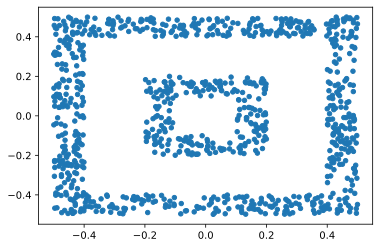

In [38]:
data = np.load('./data/data.npy')
print(data)
print(len(data))
plt.scatter(data[:, 0], data[:, 1], s=20)
plt.show()

# 聚类，绘制结果

cluster Numbers =  2


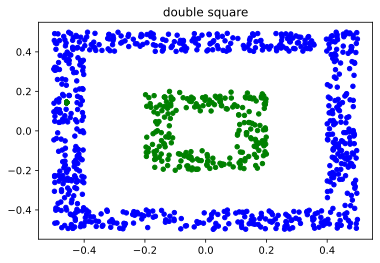

In [39]:
data = np.mat(data).transpose()
clusters, clusterNum = dbscan(data, 0.2, 4)
print("cluster Numbers = ", clusterNum)  # print(clusters)

plotFeature('double square', data, clusters, clusterNum)
if not os.path.exists('./pictures'):
    os.makedirs('./pictures')
plt.savefig('./pictures/doublesquare.png', dpi=200, bbox_inches='tight')